Enter the size of population: 5
Enter the number of points in each polygon: 4
Polygon# 1: [['01001001', '11010111'], ['11101011', '01110001'], ['11011011', '11100111'], ['01111011', '11110101']]
Polygon# 2: [['11100011', '00000100'], ['10111010', '10110000'], ['10001000', '11110001'], ['11101110', '11111001']]
Polygon# 3: [['10000000', '00111110'], ['11111101', '01000100'], ['10010101', '11000100'], ['10110101', '00100110']]
Polygon# 4: [['01101100', '10110010'], ['11010000', '11110001'], ['01001100', '11010100'], ['10011100', '00010111']]
Polygon# 5: [['10011011', '10111110'], ['11111111', '00010000'], ['00001101', '11110110'], ['10101111', '10100001']]
Total fitness: 2
Roulette pick: [['10011011', '10111110'], ['11111111', '00010000'], ['00001101', '11110110'], ['10101111', '10100001']]

Before crossover: 
Parent1: [['01001001', '11010111'], ['11101011', '01110001'], ['11011011', '11100111'], ['01111011', '11110101']]
Parent2: [['11100011', '00000100'], ['10111010', '10110000'], ['10

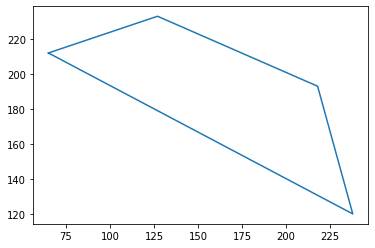

Intersections: 0
Total fitness: 2
Total fitness: 2

Before crossover: 
Parent1: [['10011011', '10111110'], ['11111111', '00010000'], ['00001101', '11110110'], ['10101111', '10100001']]
Parent2: [['10011011', '10111110'], ['11111111', '00010000'], ['00001101', '11110110'], ['10101111', '10100001']]
After crossover: 
Child1: [['10011011', '10111110'], ['11111111', '00010000'], ['00001101', '11110110'], ['10101111', '10100001']]
Child2: [['10011011', '10111110'], ['11111111', '00010000'], ['00001101', '11110110'], ['10101111', '10100001']]

Before Mutation: 
Polygon: [['10011011', '10111110'], ['11111111', '00010000'], ['00001101', '11110110'], ['10101111', '10100001']]
After Mutation: 
Polygon: [['11011011', '10011110'], ['11111110', '00110000'], ['00001111', '11110100'], ['10101101', '10100001']]

Before Mutation: 
Polygon: [['11011011', '10011110'], ['11111110', '00110000'], ['00001111', '11110100'], ['10101101', '10100001']]
After Mutation: 
Polygon: [['11011011', '10001110'], ['11110

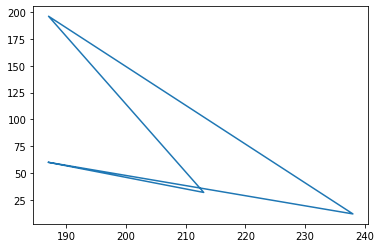

In [6]:
import random
import shapely
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import numpy as np

def binaryVal(decimal): # we are using 8 bits space to represent a MAX of 255x255 board
    if (decimal > 255):
        print("Number can't be greater than 255")
        return -1;
    
    num = bin(decimal).replace("0b","")
    num = num.rjust(8, '0')
    return num;

def print_population(population):
    for i in range(pop_size):
        print(f"Polygon# {i + 1}: {population[i]}")

def generate_population(size, points): #creating initial population  
    coordinates = [[0 for x in range(points)] for y in range(size)] 
    for i in range(size):
        for j in range (points):
            x = random.randint(0, 255)
            y = random.randint(0, 255)
            coordinates[i][j] = ([binaryVal(x), binaryVal(y)])
    return coordinates

def int_population(population, size, points):
    for i in range (size):
        for j in range (points):
            for k in range (2):
                population[i][j][k] = int(population[i][j][k], 2)
    return population

def findIntersection(A,B,C,D):
    line1 = LineString([A, B])
    line2 = LineString([C, D])
    return line1.intersects(line2)
    

def plot(polygon):
    plotx = []
    ploty = []
    pol = []
    for i in range (pol_points): # for all points in the chromosome (polygon)
        point = polygon[i]
        x = int(point[0], 2)
        y = int(point[1], 2)
        if i==0:
            fx = x
            fy = y
        plotx.append(x)
        ploty.append(y)
        pol.append([x,y])
        #print(f" x: {x}, y: {y}")

    plotx.append(fx)
    ploty.append(fy)
    print (pol)
    plt.plot(plotx,ploty)
    plt.show()
    
    
def fitness_function(polygon):
    intersections = (-1*pol_points) + 1
    plotx = []
    ploty = []
    pol = []
    
    for i in range (pol_points): # for all points in the chromosome (polygon)
        point = polygon[i]
        x = int(point[0], 2)
        y = int(point[1], 2)
        if i==0:
            fx = x
            fy = y
        plotx.append(x)
        ploty.append(y)
        pol.append([x,y])
        #print(f" x: {x}, y: {y}")

    plotx.append(fx)
    ploty.append(fy)
    #print (pol)
    #plt.plot(plotx,ploty)
    #plt.show()

    # making all lines in polygon
    lines = []
    for i in range(pol_points - 1):
            lines.append(LineString([pol[i], pol[i+1]]))
    lines.append(LineString([pol[pol_points-1],pol[0]]))  
    
    #checking for intersections 
    for i in range(len(lines)):
        lines_except_one = []
        lines_except_one = lines[:i] + lines[i+1:]
        for k in range (len(lines_except_one)):
            if lines[i].intersects(lines_except_one[k]) == True:
                intersections += 1
            
    intersections -= pol_points + 2  
    if intersections < 0:
        intersections = 0
    #print(f"Intersections: {intersections}")
    return intersections
    
    
def crossover(polygon1, polygon2):
    print("")
    #pivot = random.randint(0, 8)
    pivot = 4 # pivot at 4 because we are using 8 bits to represent a point
    print("Before crossover: ")
    print(f"Parent1: {polygon1}")
    print(f"Parent2: {polygon2}")
    print("After crossover: ")
    for i in range(pol_points):
        for j in range (2):  # 2 because 1 for x and 1 for y
            temp = polygon1[i][j][pivot:]
            polygon1[i][j] = polygon1[i][j][:pivot] + polygon2[i][j][pivot:]
            polygon2[i][j] = polygon2[i][j][:pivot] + temp
    print(f"Child1: {polygon1}")
    print(f"Child2: {polygon2}")
    return polygon1, polygon2
    
def bitflip(str):
    mut_point = random.randint(0, 8)
    mystr = ""
    i=0
    for c in str:
        if i == mut_point:
            if c == '0':
                mystr += '1'
            else:
                mystr += '0'
        else:
            mystr += c
        i += 1
    return mystr
    
def mutation(polygon):
    print("")
    print("Before Mutation: ")
    print(f"Polygon: {polygon}")
    mut_point = random.randint(0, 8)
    for i in range (pol_points):
        for j in range (2):
            polygon[i][j] = bitflip(polygon[i][j])
    
    print("After Mutation: ")
    print(f"Polygon: {polygon}")
    
def roulette_selection(population):
    sum_fitness = 0
    chrom_fitnesses = []
    for i in range (pop_size):
        fit = fitness_function(population[i])
        sum_fitness += fit
        chrom_fitnesses.append(fit)
    print(f"Total fitness: {sum_fitness}")
    
    chrom_probabilities = [chrom_fitnesses[i]/sum_fitness for i in range (pop_size)]
    #chrom_probabilities = 1 - np.array(chrom_probabilities)
    #print(chrom_probabilities)
    pick_one = [i for i in range(pop_size)] 
    choice = np.random.choice(pick_one, p=chrom_probabilities)
    return population[choice]

def fitness_all(population):
    chrom_fitnesses = []
    for i in range (len(population)):
        chrom_fitnesses.append(fitness_function(population[i]))
    return chrom_fitnesses


def GA(population, max_gen):
    i=0
    while i < max_gen:
        all_fitnesses = fitness_all(population)
        parent1 = roulette_selection(population)
        parent2 = roulette_selection(population)
        child1, child2 = crossover(parent1, parent2)
        mutation(child1)
        mutation(child2)
        population = population[:pop_size - 2]
        population.append(child1)
        population.append(child2)
        i = i+1
    print(f"Intersection: {fitness_function(child1)}")
    plot(child1)
    
def main():   # main function 
    global pop_size
    pop_size = int(input("Enter the size of population: "))
    global pol_points
    pol_points = int(input("Enter the number of points in each polygon: "))
    
    
    pop = generate_population(pop_size, pol_points)    
    print_population(pop)


    roulette_pick = roulette_selection(pop)
    print(f"Roulette pick: {roulette_pick}")
    crossover(pop[0], pop[1])
    mutation(pop[0])
    plot(pop[0])
    print (f"Intersections: {fitness_function(pop[0])}")
    
    GA(pop, 3)

if __name__ == "__main__":
    main() 